# Init

In [1]:
import time
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from oxford_log_processing import proccess_log

# Oxford RIE Log Processing

The following example shows how to use the processing log function to load in and parse log files. The returned stats array returns the measured variables as followed:

|index|   parameter|units|
|-----|------------|-----|
|    0|        Date|epoch|
|    1|           ?|     |
|    3|           ?|     |
|    5|           ?|     |
|    7|    Position|  Deg|
|    9|     Forward|    W|
|   11|   Reflected|    W|
|   13|   Lower Mag|    %|
|   15| Lower Phase|    %|
|   17|     DC Bias|    V|
|   19| He Pressure| Torr|
|   21|     He Flow| sccm|
|   23|   CHF3 Flow| sccm|
|   25|    SF6 Flow| sccm|
|   27|    CF4 Flow| sccm|
|   29|     Ar Flow| sccm|
|   31|     O2 Flow| sccm|
|   33|Chiller Temp|    C|

In [2]:
stats = []
for filename in os.listdir('logs'):
    with open('logs/'+filename) as log_file:
        cur_stats = proccess_log(log_file,'Chamber_Clean','Chamber_Clean')
    if len(cur_stats) > 1:
        stats.append(cur_stats)
    
stats = np.array(stats)

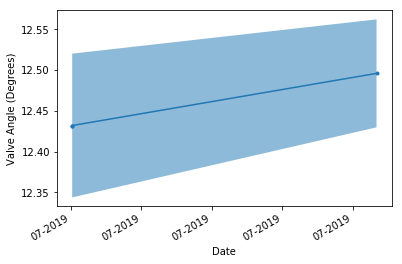

In [3]:
plt.figure()
col = 7
plt.plot(stats[:,0],stats[:,col],'.-')
plt.fill_between(stats[:,0], stats[:,col]-stats[:,col+1], stats[:,col]+stats[:,col+1], alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Valve Angle (Degrees)')

plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_formatter(
    mtick.FuncFormatter(lambda pos,_: time.strftime("%m-%Y",time.localtime(pos)))
    )
plt.show()

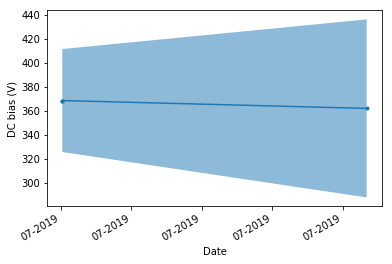

In [4]:
fig, ax = plt.subplots()
col = 17
plt.plot(stats[:,0],stats[:,col],'.-')
plt.fill_between(stats[:,0], stats[:,col]-stats[:,col+1], stats[:,col]+stats[:,col+1], alpha=0.5)
plt.xlabel('Date')
plt.ylabel('DC bias (V)')

plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_formatter(
    mtick.FuncFormatter(lambda pos,_: time.strftime("%m-%Y",time.localtime(pos)))
    )
plt.show()

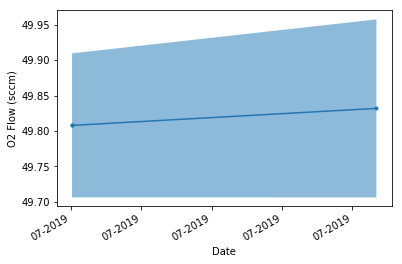

In [5]:
fig, ax = plt.subplots()
col = 31
plt.plot(stats[:,0],stats[:,col],'.-')
plt.fill_between(stats[:,0], stats[:,col]-stats[:,col+1], stats[:,col]+stats[:,col+1], alpha=0.5)
plt.xlabel('Date')
plt.ylabel('O2 Flow (sccm)')

plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_formatter(
    mtick.FuncFormatter(lambda pos,_: time.strftime("%m-%Y",time.localtime(pos)))
    )
plt.show()